In [1]:
import napari
import numpy as np
from elf.io import open_file
import matplotlib.pyplot as plt

## View directories with .tiff files

In [2]:
raw_folder = "/g/kreshuk/data/from_edoardo/cryoSEM/F107a1_bin2"
boundary_folder = "/g/kreshuk/data/from_edoardo/cryoSEM/F107a1_bin2_boundaries"
label_folder = "/g/kreshuk/data/from_edoardo/cryoSEM/F107a1_bin2_cells"

In [3]:
with open_file(raw_folder) as f:
    raw = f["*.tiff"][:]
    print(raw.shape)
with open_file(boundary_folder) as f:
    boundaries = f["*.tiff"][:]
    print(np.unique(boundaries))
    boundaries = boundaries == 255
    print(boundaries.shape)
with open_file(label_folder) as f:
    labels = f["*.tiff"][:]
    print(np.unique(labels))
    labels = labels == 255
    print(labels.shape)

v = napari.Viewer()
v.add_image(raw)
v.add_labels(boundaries)
v.add_labels(labels)
napari.run()

KeyboardInterrupt: 

In [4]:
raw_folder = "/g/kreshuk/buglakova/data/cryofib/F107_bin2_619-639_frames/train"
label_folder = "/g/kreshuk/buglakova/data/cryofib/corrected_labels/train"

In [5]:
with open_file(raw_folder) as f:
    raw = f["*.tiff"][:]
    print(raw.shape)
with open_file(label_folder) as f:
    labels = f["*.tiff"][:]
    print(np.unique(labels))

    print(labels.shape)

v = napari.Viewer()
v.add_image(raw)
# v.add_labels(boundaries)
v.add_labels(labels)
napari.run()

(9, 1506, 1647)
[    0     1     2   512   767  1022  1277  1532  1787  2042  2297  2552
  2807  3062  3317  3572  3827  4082  4337  4592  4847  5357  5612  5867
  6122  6377  6632  6887  7142  7397  7652  7907  8162  8417  8672  8927
  9437  9692 10202 10457 10712 10967 11222 11477 11987 12242 12497 12752
 13007 13262 13772 14027 14282 14537 14792 15047 15302 15557 15812 16322
 16577 16832 17087 17342 17597 17852 18107 18362 18617 18872 19127 19382
 19637 20147 20402 20912 21167 21422 21677 21932 22187 22442 22697 22952
 23207 23462 23717 23972 24227 24482 24992 25247 26012 26777 27797 28052
 29072 29327 29582]
(9, 1506, 1647)


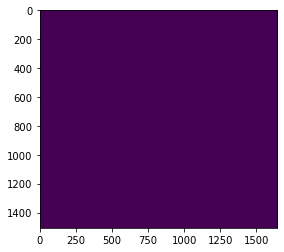

In [12]:
plt.imshow(labels[0, :, :])

In [9]:
v.add_labels(labels.astype(int))

<Labels layer 'Labels' at 0x7fc39f055d60>

In [8]:
labels

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [10]:
raw_folder = "/g/kreshuk/buglakova/data/cryofib/F107_bin2_619-639_frames/train"
prediction_folder = "/g/kreshuk/buglakova/data/cryofib/F107_bin2_619-639_predictions/train"
label_folder = "/g/kreshuk/buglakova/data/cryofib/corrected_labels/train"

In [11]:
with open_file(raw_folder) as f:
    raw = f["*.tiff"][:]
    print("Raw shape: ", raw.shape)
with open_file(prediction_folder) as f:
    predictions = f["*.tiff"][:]
    print("Predictions shape: ", predictions.shape)
    cells = predictions[:, :, :, 0]
    outside = predictions[:, :, :, 1]
    boundaries = predictions[:, :, :, 2]
    extracellular = predictions[:, :, :, 3]
    
with open_file(label_folder) as f:
    labels = f["*.tiff"][:]    
    print("Labels shape: ", labels.shape)


Raw shape:  (9, 1506, 1647)
Predictions shape:  (9, 1506, 1647, 4)
Labels shape:  (9, 1506, 1647)


In [4]:

v = napari.Viewer()


<Labels layer 'labels' at 0x7fcbf525be20>

In [6]:
# v.add_image(raw)
# v.add_labels(boundaries)
v.add_labels(labels)

<Labels layer 'labels [1]' at 0x7fca774c59a0>

In [16]:
v.add_image(outside)

<Image layer 'outside' at 0x7fc9b3bcb820>

## View n5 dataset

In [3]:
import z5py
from pathlib import Path

In [4]:
scratch_dir = Path("/scratch/buglakova")
predictions_dir = scratch_dir / "F107_bin2_619-639_predictions"
predictions_dir.mkdir(parents=True, exist_ok=True)
train_n5_path = predictions_dir / "train.n5"
train_pred_n5_path = predictions_dir / "train_predictions.n5"
train_multicut_n5_path = predictions_dir / "train_multicut.n5"

In [5]:
n5_path = predictions_dir / "full_raw.n5"
pred_n5_path = predictions_dir / "full_predictions.n5"
multicut_n5_path = predictions_dir / "full_multicut.n5"

In [6]:
f = z5py.File(train_pred_n5_path, "r")
f_raw = z5py.File(train_n5_path, "r")
f_multicut = z5py.File(train_multicut_n5_path, "r")

In [7]:
f = z5py.File(pred_n5_path, "r")
f_raw = z5py.File(n5_path, "r")
f_multicut = z5py.File(multicut_n5_path, "r")

In [8]:
def read_raw(f: z5py.File):
    raw = f["raw"]["raw_data"]
    raw.n_threads = 8
    print("Reading raw data into memory")
    raw = raw[:]
    print("Raw data shape: ", raw.shape, type(raw))
    return raw

In [9]:
raw = read_raw(f_raw)

Reading raw data into memory
Raw data shape:  (1350, 1506, 1647) <class 'numpy.ndarray'>


In [10]:
def read_boundaries(f: z5py.File):
    g = f["predictions"]
    g.n_threads = 8
    print("Reading boundary probabilities into memory")
    boundaries = g["boundaries"][:]
    # extra = g["extracellular"][:]
    return boundaries

In [11]:
boundaries = read_boundaries(f)

Reading boundary probabilities into memory


In [11]:
def read_extracellular(f: z5py.File):
    g = f["predictions"]
    g.n_threads = 8
    print("Reading extracellular space probabilities into memory")
    # boundaries = g["boundaries"][:]
    extra = g["extracellular"][:]
    return extra

In [12]:
extra = read_extracellular(f)

Reading extracellular space probabilities into memory


In [11]:
def read_ws(f: z5py.File):
    g = f["watershed"]
    g.n_threads = 8
    print("Reading watershed into memory")
    ws = g["watershed"][:]
    # extra = g["extracellular"][:]
    return ws

In [12]:
ws = read_ws(f_multicut)

Reading watershed into memory


In [12]:
def read_multicut(f: z5py.File):
    g = f["segmentation"]
    g.n_threads = 8
    print("Reading multicut segmentation into memory")
    seg = g["multicut"][:]
    # extra = g["extracellular"][:]
    return seg

In [13]:
seg = read_multicut(f_multicut)

Reading multicut segmentation into memory


In [1]:
v = napari.Viewer()

NameError: name 'napari' is not defined

In [17]:
v.add_image(raw)

<Image layer 'raw' at 0x7f38d0adb790>

In [18]:
v.add_image(boundaries)

<Image layer 'boundaries' at 0x7f36fc5ff730>

In [19]:
v.add_image(extra)

<Image layer 'extra' at 0x7f361c7ec6a0>

In [16]:
v.add_labels(ws)

<Labels layer 'ws' at 0x7f4ff27fbd90>

In [20]:
v.add_labels(seg)

<Labels layer 'seg' at 0x7f362ff32310>

## Save segmentation

In [15]:
corrected_segmentation_path = predictions_dir / "full_corrected.n5"
f_save = z5py.File(corrected_segmentation_path, "a")
f_save.create_dataset("corrected", shape=seg.shape, compression="gzip", chunks=(1, 512, 512), dtype=seg.dtype)
f_save["corrected"].n_threads = 8

In [ ]:
def save_corrected_segmentation(seg, f):
    f["corrected"][:] = seg

In [ ]:
save_corrected_segmentation(seg, f_save)